## UAP Exercise

In [99]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Solving Linear Equation

Periksa apakah matriks koefisien bersifat **dominasi diagonal**.<br>
Jika **tidak dominan diagonal**, berikan error message.<br>
Jika **dominan diagonal**, gunakan metode **Gauss-Seidel** dengan: <br>
    - Maksimal iterasi: **40** <br>
    - Nilai awal semua variabel: **0** <br>
    - Batas toleransi konvergensi **ϵ = 0.012** <br>

In [100]:
x = [
    [
        [10, -1, 2, 0, 3],
        [2, 12, -1, 2, -3],
        [1, 1, 11, -1, -2],
        [0, 3, 2, 10, 1],
        [-1, 2, -1, 1, 9]
    ],
    [
        [1, 4, 3, 2, 5],
        [2, 1, 5, 3, 6],
        [3, 2, 1, 7, 8],
        [4, 6, 5, 1, 9],
        [5, 7, 8, 9, 1]
    ],
    [
        [15, 2, 1, 3, 2],
        [2, 14, 3, 2, 1],
        [3, 1, 13, 2, 2],
        [1, 2, 3, 16, 1],
        [2, 1, 1, 2, 12]
    ],
    [
        [4, 6, 5, 2, 1],
        [5, 4, 3, 2, 6],
        [7, 3, 4, 8, 5],
        [6, 5, 4, 3, 2],
        [5, 2, 6, 4, 3]
    ],
    [
        [20, -3, 2, 1, -4],
        [-2, 21, 3, -2, 1],
        [3, -1, 19, 2, 2],
        [1, -1, 2, 22, -3],
        [2, 2, -1, 1, 18]
    ]
]

y = [
    [30, 24, 18, 21, 17],
    [60, 70, 80, 90, 100],
    [45, 50, 55, 60, 40],
    [80, 60, 90, 70, 85],
    [75, 62, 59, 78, 66]
]

In [101]:
def diagonal_dom(x):
    x = np.array(x)

    diag = np.diag(np.abs(x))
    off_diag = np.sum(np.abs(x), axis=1) - diag

    result = np.all(diag > off_diag)
    return result

def gauss_seidel(x, y, tol, max_iter):
    x = np.array(x)
    y = np.array(y)

    diag = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)

    old_res = np.zeros(len(x))

    for i in range(max_iter):
        new_res = np.array(old_res)

        for idx, row in enumerate(x):
            new_res[idx] = (y[idx] + np.dot(row, new_res)) / diag[idx]

        print(f"Iteration #{i + 1} : {new_res}")

        distance = np.sqrt(np.dot(old_res - new_res, old_res - new_res))
        print(f"Difference = {distance}")

        if distance < tol:
            print(f"\nConvergent at iteration {i + 1} with result = {new_res} and difference = {distance}")
            return
        else:
            print("Not Convergent")

        old_res = new_res

def run_gauss_seidel(x, y, tol, max_iter):
    for i, x in enumerate(x):
        print(f"Matrix #{i + 1}")
        if diagonal_dom(x):
            print("Diagonal Dominant")
            gauss_seidel(x, y[i], tol, max_iter)
            print("")
        else:
            print("Not Diagonally Dominant!")
            print("")

In [102]:
run_gauss_seidel(x, y, 0.012, 40)

Matrix #1
Diagonal Dominant
Iteration #1 : [3.         1.5        1.22727273 1.40454545 1.86919192]
Difference = 4.2688200608322795
Not Convergent
Iteration #2 : [2.34378788 1.94484848 1.71402663 0.98682094 1.79792184]
Difference = 1.0222558782575613
Not Convergent
Iteration #3 : [2.31230297 2.04246203 1.65708178 0.97605285 1.76760087]
Difference = 0.12164592947663717
Not Convergent
Iteration #4 : [2.34254958 2.02688996 1.64925591 0.98532174 1.77252265]
Difference = 0.036451715556210226
Not Convergent
Iteration #5 : [2.34108102 2.02616819 1.65119253 0.98465877 1.77280871]
Difference = 0.0026361857255215366

Convergent at iteration 5 with result = [2.34108102 2.02616819 1.65119253 0.98465877 1.77280871] and difference = 0.0026361857255215366

Matrix #2
Not Diagonally Dominant!

Matrix #3
Diagonal Dominant
Iteration #1 : [3.         3.14285714 3.2967033  2.55151099 1.87145147]
Difference = 6.305421679836416
Not Convergent
Iteration #2 : [1.6013431  2.13805218 3.0163072  2.70013622 2.1868

**Output:**
```python
Matrix #1
Diagonally Dominant
Iteration #1 : [3.         1.5        1.22727273 1.40454545 1.86919192]
Difference = 4.2688200608322795
Not Convergent
Iteration #2 : [2.34378788 1.94484848 1.71402663 0.98682094 1.79792184]
Difference = 1.0222558782575613
Not Convergent
Iteration #3 : [2.31230297 2.04246203 1.65708178 0.97605285 1.76760087]
Difference = 0.12164592947663717
Not Convergent
Iteration #4 : [2.34254958 2.02688996 1.64925591 0.98532174 1.77252265]
Difference = 0.036451715556210226
Not Convergent
Iteration #5 : [2.34108102 2.02616819 1.65119253 0.98465877 1.77280871]
Difference = 0.0026361857255215366

Convergent at iteration 5 with result = [2.34108102 2.02616819 1.65119253 0.98465877 1.77280871] and difference = 0.0026361857255215366

Matrix #2
Not Diagonally Dominant!

Matrix #3
Diagonally Dominant
Iteration #1 : [3.         3.14285714 3.2967033  2.55151099 1.87145147]
Difference = 6.305421679836416
Not Convergent
Iteration #2 : [1.6013431  2.13805218 3.0163072  2.70013622 2.18689017]
Difference = 1.779350202820477
Not Convergent
Iteration #3 : [1.68222663 2.14281875 2.92588066 2.69172523 2.18194974]
Difference = 0.12180713145575128
Not Convergent
Iteration #4 : [1.68996044 2.16264549 2.92462486 2.68930776 2.1795161 ]
Difference = 0.021592946418695844
Not Convergent
Iteration #5 : [1.68820858 2.16368404 2.92569558 2.68923878 2.17964381]
Difference = 0.0023054537700569677

Convergent at iteration 5 with result = [1.68820858 2.16368404 2.92569558 2.68923878 2.17964381] and difference = 0.0023054537700569677

Matrix #4
Not Diagonally Dominant!

Matrix #5
Diagonally Dominant
Iteration #1 : [3.75       3.30952381 2.68734336 3.28112896 2.84928704]
Difference = 7.149930494153796
Not Convergent
Iteration #2 : [4.3834952  3.16275863 1.93428637 3.70266145 2.72995096]
Difference = 1.0871438490944538
Not Convergent
Iteration #3 : [4.39184228 3.31696178 1.90927422 3.695292   2.71090967]
Difference = 0.15776809846287745
Not Convergent
Iteration #4 : [4.41403418 3.32285333 1.90886039 3.69199215 2.70794962]
Difference = 0.02338831103553173
Not Convergent
Iteration #5 : [4.41453228 3.32278657 1.90943717 3.6915104  2.7079605 ]
Difference = 0.0009041196912448558

Convergent at iteration 5 with result = [4.41453228 3.32278657 1.90943717 3.6915104  2.7079605 ] and difference = 0.0009041196912448558
```

### 2. Regression

Carilah hasil dari **Least Square Regression** menggunakan matplotlib berserta dengan legendnya

In [103]:
x = [1.05, 1.44, 1.83, 2.22, 2.61, 3.00, 3.39, 3.77, 4.16, 4.55, 4.94, 5.33, 5.72, 6.11, 6.50, 6.89, 7.28, 7.67, 8.06, 8.45, 8.84, 9.22, 9.61, 10.00, 10.39, 10.77, 11.16, 11.55, 11.94, 12.33, 12.72, 13.11, 13.50, 13.89, 14.28, 14.67, 15.06, 15.45, 15.84, 16.23, 16.62, 17.01, 17.40, 17.79, 18.18, 18.57, 18.96, 19.35, 19.74, 20.13]

y = [5.95, 5.93, 6.11, 6.39, 6.55, 6.28, 5.29, 6.88, 7.28, 7.20, 6.13, 7.75, 7.82, 8.22, 7.03, 8.59, 8.81, 8.85, 8.65, 9.61, 8.22, 8.74, 9.04, 8.78, 10.86, 10.81, 9.69, 10.61, 11.31, 10.59, 12.02, 10.49, 12.18, 11.38, 11.05, 11.48, 12.96, 12.54, 12.42, 12.55, 12.34, 13.30, 14.20, 13.99, 14.40, 13.46, 15.12, 13.90, 13.95, 14.42]

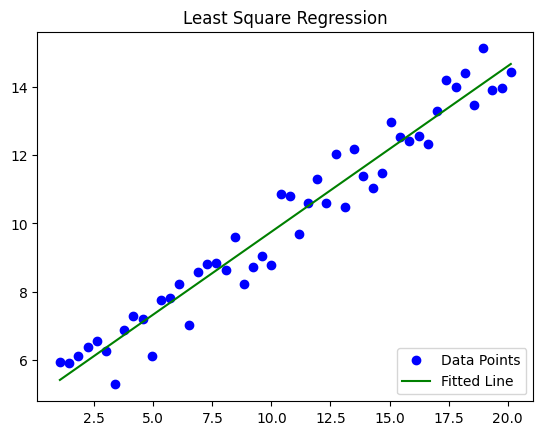

In [104]:
x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]

alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)

plt.plot(x, y, 'bo', label="Data Points")
plt.plot(x, alpha[0] * x + alpha[1], 'g', label="Fitted Line")
plt.title("Least Square Regression")
plt.legend(loc="lower right")
plt.show()

**Output:** <br>
![Output](output.png)

### 3. Newton Raphson

Diberikan persamaan sebagai berikut: <br>
***5x⁶ - 7x⁵ + 4x⁴ - 7x³ + 4x² - 8x + 1***

Berapa hasil yang didapatkan dari persamaan tersebut dengan: <br>
Tebakan pertama = **12** <br>
Batas toleransi error = **ϵ = 0.011** <br>
Maksimum iterasi = **45** <br>

In [105]:
def f(x):
    return 5 * x**6 - 7 * x**5 + 4 * x**4 - 7 * x**3 + 4 * x**2 - 8 * x + 1

def g(x):
    return 30 * x**5 - 35 * x**4 + 16 * x**3 - 21 * x**2 + 8 * x - 8

In [106]:
def newton_raphson(x, tol, max_iter):
    for i in range(max_iter):
        x = x - f(x) / g(x)

        print(f"Iteration #{i + 1} root = {x}")

        if np.abs(f(x)) < tol:
            print(f"Final root answer at iteration #{i + 1} = {x}")
            return
    print("Over the max iterations!")

In [107]:
print("Newton Raphson")
newton_raphson(12, 0.011, 45)

Newton Raphson
Iteration #1 root = 10.039681030740791
Iteration #2 root = 8.406419404463316
Iteration #3 root = 7.045858471676055
Iteration #4 root = 5.912776207942449
Iteration #5 root = 4.969605008553551
Iteration #6 root = 4.185226840733548
Iteration #7 root = 3.5340214730965243
Iteration #8 root = 2.9951713017864456
Iteration #9 root = 2.55226819828194
Iteration #10 root = 2.1933334602274734
Iteration #11 root = 1.9114164172981236
Iteration #12 root = 1.7056425520596765
Iteration #13 root = 1.5801888195570257
Iteration #14 root = 1.5311748229965103
Iteration #15 root = 1.5241947716629771
Final root answer at iteration #15 = 1.5241947716629771


**Output:**
```python
Newton Raphson
Iteration #1 root = 10.039681030740791
Iteration #2 root = 8.406419404463316
Iteration #3 root = 7.045858471676055
Iteration #4 root = 5.912776207942449
Iteration #5 root = 4.969605008553551
Iteration #6 root = 4.185226840733548
Iteration #7 root = 3.5340214730965243
Iteration #8 root = 2.9951713017864456
Iteration #9 root = 2.55226819828194
Iteration #10 root = 2.1933334602274734
Iteration #11 root = 1.9114164172981236
Iteration #12 root = 1.7056425520596765
Iteration #13 root = 1.5801888195570257
Iteration #14 root = 1.5311748229965103
Iteration #15 root = 1.5241947716629771
Final root answer at iteration #15 = 1.5241947716629771
```

Carilah kembali hasilnya dengan: <br>
Tebakan pertama = **754** <br>
Batas toleransi error = **ϵ = 0.0011** <br>
Maksimum iterasi = **35** <br>

In [108]:
print("Newton Raphson")
newton_raphson(754, 0.0011, 35)

Newton Raphson
Iteration #1 root = 628.3722236209909
Iteration #2 root = 523.6824102924635
Iteration #3 root = 436.44089958812884
Iteration #4 root = 363.739641177091
Iteration #5 root = 303.1552598163033
Iteration #6 root = 252.66827618082147
Iteration #7 root = 210.59579089353838
Iteration #8 root = 175.53538788970044
Iteration #9 root = 146.31838722976127
Iteration #10 root = 121.97088912302956
Iteration #11 root = 101.68131063249223
Iteration #12 root = 84.77333295520097
Iteration #13 root = 70.68335752701415
Iteration #14 root = 58.94171949737121
Iteration #15 root = 49.15703236944062
Iteration #16 root = 41.003141979018565
Iteration #17 root = 34.20825497215523
Iteration #18 root = 28.545879437645944
Iteration #19 root = 23.827275775088438
Iteration #20 root = 19.89516625012425
Iteration #21 root = 16.618493691234704
Iteration #22 root = 13.888054828492287
Iteration #23 root = 11.61286305282687
Iteration #24 root = 9.717119899355342
Iteration #25 root = 8.137695222458442
Iteratio

**Output:**
```python
Newton Raphson
Iteration #1 root = 628.3722236209909
Iteration #2 root = 523.6824102924635
Iteration #3 root = 436.44089958812884
Iteration #4 root = 363.739641177091
Iteration #5 root = 303.1552598163033
Iteration #6 root = 252.66827618082147
Iteration #7 root = 210.59579089353838
Iteration #8 root = 175.53538788970044
Iteration #9 root = 146.31838722976127
Iteration #10 root = 121.97088912302956
Iteration #11 root = 101.68131063249223
Iteration #12 root = 84.77333295520097
Iteration #13 root = 70.68335752701415
Iteration #14 root = 58.94171949737121
Iteration #15 root = 49.15703236944062
Iteration #16 root = 41.003141979018565
Iteration #17 root = 34.20825497215523
Iteration #18 root = 28.545879437645944
Iteration #19 root = 23.827275775088438
Iteration #20 root = 19.89516625012425
Iteration #21 root = 16.618493691234704
Iteration #22 root = 13.888054828492287
Iteration #23 root = 11.61286305282687
Iteration #24 root = 9.717119899355342
Iteration #25 root = 8.137695222458442
Iteration #26 root = 6.822033670146324
Iteration #27 root = 5.726420566016252
Iteration #28 root = 4.8145547904538
Iteration #29 root = 4.056391437911324
Iteration #30 root = 3.427235919049215
Iteration #31 root = 2.907099216822911
Iteration #32 root = 2.480369942711003
Iteration #33 root = 2.1359280793923894
Iteration #34 root = 1.8678597976965672
Iteration #35 root = 1.676458473635795
Over the max iterations!
```

### 4. Integral Riemann

$$
\int_{1}^{11} \left(60x^6 - 45x^5 + 22x^4 - 13x^3 + 8x^2 - 5x + 11\right)\,dx
$$

Dengan **75000 spaced grid points**, carilah **Left Riemann, Middle Riemann, dan Right Riemann**

In [109]:
def f(x):
    return 60 * x**6 - 45 * x**5 + 22 * x**4 - 13 * x**3 + 8 * x**2 - 5 * x + 11

a = 1
b = 11
n = 75000

width = (b - 1) / (n - 1)
x = np.linspace(a, b, n)

In [110]:
print("Solve Integral using Riemann:")

left = width * np.sum(f(x[:-1]))
print(f"Left Riemann = {left}")

mid = (x[:-1] + x[1:]) / 2
midRiemann = width * np.sum(f(mid))
print(f"Middle Riemann = {midRiemann}")

right = width * np.sum(f(x[1:]))
print(f"Right Riemann = {right}")

Solve Integral using Riemann:
Left Riemann = 154403958.90382048
Middle Riemann = 154410582.3403613
Right Riemann = 154417206.02044868


**Output:**

```python
Solve Integral using Riemann:
Left Riemann = 154403958.90382048
Middle Riemann = 154410582.3403613
Right Riemann = 154417206.02044868
```